ICS 2207 Scientific Computing – CAT 

Instructions: Answer ALL questions. Each question is worth 20 marks.

Question 1: Practical Gradient Descent Implementation (20 marks) 
You are provided with the function f(x) = x^2 - 6x + 9. 
a) Implement a Python function that performs gradient descent to minimize this function. 
The function should take as parameters: - the initial guess x0, - learning rate alpha, - and number of iterations n. 
The function should return the list of x-values and f(x)-values for each iteration. [10 
Marks] 
b) Run your function with x0 = 2, alpha = 0.1, and n = 10. Present the output as a table 
with columns: iteration, x-value, f(x)-value.                                                          
[6 Marks] 
c) Explain what would happen if the learning rate were set to 1 instead of 0.1, using 
insights from your code and outputs.                                                                     
[4 Marks] 

Question 2: Linear Systems with Application Context (20 marks) 
A researcher is modeling a simple electrical circuit where: - 2I1 + 3I2 = 8 (KVL Equation 1) - 5I1 + 7I2 = 19 (KVL Equation 2) 
a) Formulate this system of equations as a matrix problem and solve it using NumPy in 
Python.                                                                                                                   
[6 Marks] 
b) Modify your code to read the coefficients and constants from a `.txt` file that has the 
system in this format: 
2 3 8 
5 7 19 
Write code to parse the file and solve the system. [8 Marks] 
c) Explain one real-world implication if the matrix of coefficients were nearly singular. 
How would that affect the solution, and what could you do about it computationally? [6 
Marks] 

Question 3: Data Visualization and Interpretation (20 marks) 
Given a file data.csv with two columns: Time (s) and Temperature (°C), your task is to 
analyze a heat transfer process. 
a) Write a Python script that: - reads the data using pandas, - plots a line graph of temperature vs time, - and adds labels, title, and grid.                                                                          
[10 Marks] 
b) Based on your graph, explain any two observations you can make about the heating 
process (e.g., steady state, rate of change).                                                            
[4 Marks] 
c) Describe a situation in engineering where such visualization can be used to influence 
decision-making.                                                                                                    
[6 Marks] 

Question 4: ODE Simulation of Real System (20 marks) 
You are simulating population growth using the differential equation dy/dt = 0.5y, where 
y(0) = 100. 
a) Use Euler’s Method to approximate the population size after 4 time steps with step size 
h = 0.5. Show all computations.                                                                             
[8 Marks] 
b) Write a Python function that generalizes the Euler’s method to solve any first-order 
ODE given f(t, y), initial condition, step size, and number of steps.                   
[6 Marks] 
c) Briefly explain two limitations of using Euler’s Method for real-world systems, and 
suggest one alternative method.  
 

In [ ]:
# QUESTION 1A

from sympy import diff, symbols,lambdify
import sympy as sp
import numpy as np

def gradient_descent(x0, alpha, n):
    # Define the variable
    x = symbols('x')

    # Define the function f(x)
    f = x**2 - 6*x + 9

    # Compute the derivative f'(x)
    f_prime =diff(f, x)

    # Convert symbolic expressions to numerical functions
    f_func = lambdify(x, f, 'numpy')
    f_prime_func =lambdify(x, f_prime, 'numpy')

    # Initialize lists to store x and f(x) values
    x_values = [x0]
    fx_values = [f_func(x0)]

    # Perform gradient descent iterations
    for i in range(n):
        x_current = x_values[-1]
        x_new = x_current - alpha * f_prime_func(x_current)
        x_values.append(x_new)
        fx_values.append(f_func(x_new))

    return x_values, fx_values

In [27]:
# QUESTION 1B
# Runing the function with x0 = 2, alpha = 0.1, and n = 10.
x_vals, f_vals = gradient_descent(x0=2, alpha=0.1, n=10)

# Print results as a table
print("{:<15} {:<15} {:<15}".format('Iteration', 'x-value', 'f(x)-value'))
print("-" * 30)
for i in range(len(x_vals)):
    print("{:<15} {:<15.5f} {:<15.5f}".format(i, x_vals[i], f_vals[i]))


Iteration       x-value         f(x)-value     
------------------------------
0               2.00000         1.00000        
1               2.20000         0.64000        
2               2.36000         0.40960        
3               2.48800         0.26214        
4               2.59040         0.16777        
5               2.67232         0.10737        
6               2.73786         0.06872        
7               2.79028         0.04398        
8               2.83223         0.02815        
9               2.86578         0.01801        
10              2.89263         0.01153        


In [28]:
# QUESTION 1C
# Runing the function with x0 = 2, alpha =1 and n = 10 to check the outputs
x_vals, f_vals = gradient_descent(x0=2, alpha=1, n=10)
print("{:<15} {:<15} {:<15}".format('Iteration', 'x-value', 'f(x)-value'))
print("-" * 30)
for i in range(len(x_vals)):
   print("{:<15} {:<15.5f} {:<15.5f}".format(i, x_vals[i], f_vals[i]))


Iteration       x-value         f(x)-value     
------------------------------
0               2.00000         1.00000        
1               4.00000         1.00000        
2               2.00000         1.00000        
3               4.00000         1.00000        
4               2.00000         1.00000        
5               4.00000         1.00000        
6               2.00000         1.00000        
7               4.00000         1.00000        
8               2.00000         1.00000        
9               4.00000         1.00000        
10              2.00000         1.00000        



 EXPLAINING THE RESULTS WITH LEARNING RATE OF 0.1 AND LEARNING RATE OF 1
 
When the learning rate is 0.1:
the updates to x are small and gradual,allowing the algorithm to slowly approach the minimum at x=3.The function 
f(x)=x**2-6*x+9 decreases steadily,and x moves closer to the minimum (x=3) while f(x) approaches 0.

When the learning rate is 1:
The algorithm makes larger updates that overshoots the minimum.For instance,if x=2, the minimum jumps to 4 and if x=4 it jumps back to 2.Hence this makes the algorithm to oscillate between 2 and 4 instead of converging to 3, hence ineffective for minimizing the function.Therefore ,a learning rate of 1 can cause the algorithm to fail to converge and instead oscillate,leading to poor results.


In [ ]:

# QUESTION 2A
# Solving a system of linear equations, 2I1 + 3I2 =8  AND 5I1 + 7I2 =19

import numpy as np
A=np.array([[2,3],[5,7]])
B=np.array([8,19])
I=np.linalg.solve(A,B)
print("I1 = {} Amperes\nI2 = {} Amperes".format(I[0], I[1]))


I1 = 1.0 Amperes
I2 = 2.0 Amperes


In [ ]:

# QUESTION 2B
# Loading data from circuit.txt
data= np.loadtxt(r"G:\CS NOTES\2.2\SCIENTIFIC COMPUTING\Assignment\Scientic computing cat\circuit.txt")

# Transpose the data matrix
C=data.T

# Extracting the coefficients matrix
A = C[0:2].T

# Extracting the costants matrix
B=C[2]

I=np.linalg.solve(A,B)

print("I1 = {} Amperes\nI2 = {} Amperes".format(I[0], I[1]))


I1 = 1.0 Amperes
I2 = 2.0 Amperes


np.float64(86.98850422812917)


QUESTION 2C

If the matrix of coefficients is nearly singular, it means the two equations are almost the same or very close to being dependent. This causes problems when solving because small errors in the numbers (like rounding or small measurement mistakes) can make the solution change a lot. This makes the result unstable and not reliable.

To fix this in Python, we can use more stable methods like np.linalg.lstsq, which gives an approximate solution that is less sensitive to small errors. We can also check how close the matrix is to being singular using np.linalg.cond(A). A high condition number means the system is not stable and needs careful handling.


<!-- QUESTION 2C -->

In [ ]:

# QUESTION 3A

import pandas as pd
# Reading data using pandas
data = pd.read_csv(r"G:\CS NOTES\2.2\SCIENTIFIC COMPUTING\Assignment\Scientic computing cat\Temp_dataset.csv", encoding='latin1')
data

,Time(s),Temperature(°C)
0,0,90.0
1,10,84.5
2,20,79.8
3,30,75.3
4,40,71.0
5,50,67.0
6,60,63.3
7,70,59.8
8,80,56.5
9,90,53.4


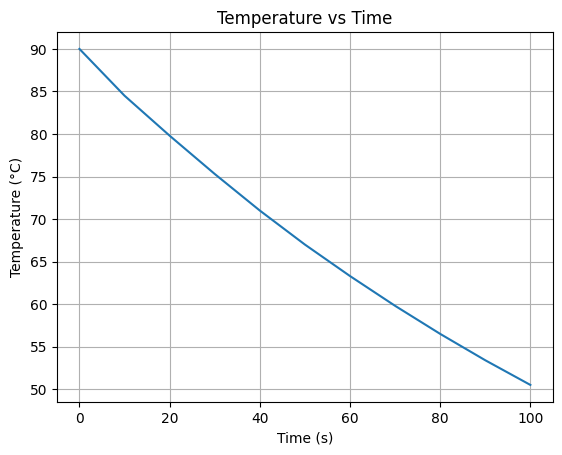

In [ ]:

import matplotlib.pyplot as plt
plt.plot(data.iloc[:, 0], data.iloc[:, 1])

plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")

plt.title("Temperature vs Time") 

plt.grid()  
plt.show()


 QUESTION 3B
 Observations from graph:

1.The temperature decreases over time: The plot clearly shows that as time progresses (along the x-axis), the temperature (along the y-axis) consistently goes down. This therefore indicates a cooling process is taking place.

2.The rate of cooling is not constant: Since the line on the graph is curved, specifically concave up.This tells us that the temperature is dropping more rapidly at the beginning of the process and then the rate of cooling slows down as time goes on. In other words, the temperature changes more drastically in the initial few seconds compared to later on.




 QUESTION 3C
 A situation in engineering where such visualization can be used to influence 
decision-making:    

In Embedded Systems & Electronics, temperature vs. time graphs are used to monitor the thermal behavior of components like CPUs or microcontrollers. This helps engineers detect overheating, evaluate cooling efficiency, and make informed decisions—such as adding heat sinks, improving airflow, or adjusting processor speed through firmware. The goal is to prevent thermal damage, maintain performance, and ensure system reliability.



QUESTION 4A

Euler's method formula:
                       Yn+1 =Yn +h*f'(Tn,Yn)
                       Tn+1=Tn+h

First order Differential equation
dy/dt=0.5y

Intitial condtions
t0=0
Y0=100

Step size
h=0.5

When n=1
t1=t0 +h=0.5
Y1=Y0 +h*f'(Y0)=100+0.5*0.5*100=125

When n=2
t2=t1+h=0.5+0.5=1
Y2=Y1 +0.5*0.5*Y1=156.25

When n=3
t3=1.5
Y3=156.25+0.5*0.5*156.25=195.3125

When n=4
t4=2
Y4=195.3125+0.5*0.5*195.3125=244.140625
Hence the approximate population size using Euler's method is 244.140625



In [ ]:

# QUESTION 4B
def euler_method(f, y0, t0, h, n):
    """
    f=first order Differential equation
    y0,t0=intitial condtions
    h=step size
    n=number of steps
    """
    t_values = [t0]
    y_values = [y0]
    
    t_current = t0
    y_current = y0
    
    for _ in range(n):
        y_current = y_current + h * f(t_current, y_current)
        t_current += h
        
        t_values.append(t_current)
        y_values.append(y_current)
    
    return t_values, y_values



QUESTION 4 C

LIMITATIONS OF EULER'S METHOD

1. Stability Issues:
In some problems—especially those with stiff differential equations, which are common in engineering Euler’s method can become unstable. This means the solution may grow wildly or give wrong results unless the step size is made very small. Using tiny step sizes increases the amount of time and computing power needed. Even then, if the step size isn't chosen carefully, Euler’s method might still fail to.

2. Low Accuracy (First-Order Method):
Euler’s Method is not very accurate. To get good results, you need to take very small steps, which means doing a lot of calculations. This makes it slow and not very efficient, especially when high precision is needed.

ALTERNATIVE FOR EULER'S METHOD

Runge-Kutta Methods:

 Especially the Fourth-Order Runge-Kutta (RK4) method is a better option than Euler’s method for solving real-world problems. It gives more accurate results and is more stable, even when the step size is not very small. Unlike Euler’s method, which can easily become inaccurate or unstable, RK4 takes more careful steps by averaging several estimates at each stage. This makes it both efficient and precise. Because of this, RK4 is often used in science and engineering to model systems more reliably and safely.


 <!-- QUESTION 3C -->
<!-- a situation in engineering where such visualization can be used to influence 
decision-making.   -->